# Cleansing Part 2


In [58]:
import pandas as pd
import numpy as np
import ssd50 as ss
import matplotlib.pyplot as plt

In [57]:
#df = pd.read_excel('filled_cleansed_data.xlsx',header=0)
df = pd.read_excel('D50_data_add.xlsx',header=0)
df=df.set_index('minute')
df.describe()

,Unnamed: 0,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_power,Sump_level,Cyc_density,Cyc_pressure,D50C
count,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000
mean,43542.000000,96.405228,16.405511,14.433792,472.983935,45.099104,5931.151818,2003.840294,41.111579,52.266530,10.474292,0.175843
std,25139.418433,25.272549,6.779508,2.813010,95.207208,16.291171,492.175031,415.561431,11.408603,9.075766,2.430468,0.357555
min,0.000000,0.000010,0.011161,0.000010,0.000010,0.316527,0.000010,0.000010,0.000010,0.000010,0.000010,0.099463
25%,21771.000000,99.590088,14.866427,15.134733,456.254913,37.918697,5947.561523,2036.000000,36.316788,53.427094,9.850447,0.116801
50%,43542.000000,103.390297,16.164457,15.139745,491.852570,45.786087,6038.729004,2154.000000,40.089287,54.019855,10.910081,0.118072
75%,65313.000000,106.395149,17.990374,15.155663,521.534058,54.256924,6095.021484,2168.000000,43.654884,54.594421,11.460250,0.120756
max,87084.000000,212.381058,110.265762,15.185266,725.713135,190.012161,6418.649902,2352.000000,103.256409,60.934116,23.790096,2.514608


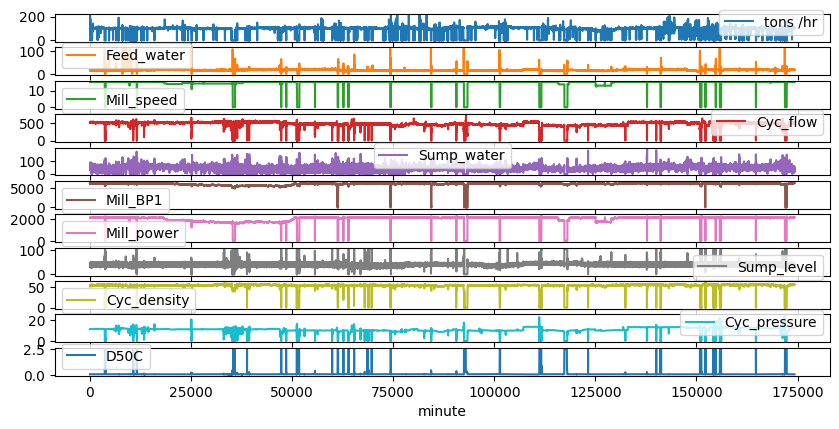

In [60]:
#df.describe()
df=df.drop('Unnamed: 0',axis=1)
df.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()


In [ ]:
#rolling windows

# #.rolling(window=5, center=True).median()
# pd.DataFrame(y[::50]).rolling(window=50,center=True).mean().plot(kind='line',figsize=(10,6))  #subplots=True,layout=(12,1),
# plt.ylim(0,2.5)
# plt.title('Actual Output');
# plt.show()

In [61]:
df.head()

,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_power,Sump_level,Cyc_density,Cyc_pressure,D50C
minute,,,,,,,,,,,
12.0,102.462509,15.509874,15.160000,525.208252,50.587109,6104.048340,2151.0,40.304512,54.255432,11.241975,0.117296
14.0,103.333893,16.375196,15.160000,529.151917,54.062538,6108.159180,2155.0,43.349667,54.202900,11.241036,0.117299
16.0,103.808968,16.706270,15.160000,527.527954,43.480278,6085.975586,2160.0,46.226486,54.150364,11.240097,0.117301
18.0,102.219231,17.050024,15.156041,520.946472,37.862888,6116.854980,2153.0,38.813515,54.099995,11.239159,0.117303
20.0,102.523087,16.613831,15.150989,520.562073,38.544147,6100.854492,2162.0,34.497410,54.051334,11.238220,0.117305


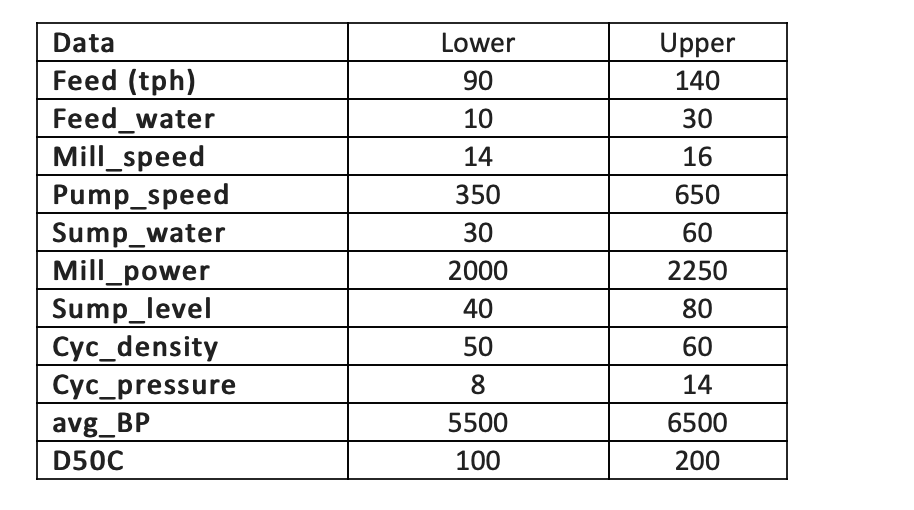

In [62]:
df.describe()

,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_power,Sump_level,Cyc_density,Cyc_pressure,D50C
count,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000
mean,96.405228,16.405511,14.433792,472.983935,45.099104,5931.151818,2003.840294,41.111579,52.266530,10.474292,0.175843
std,25.272549,6.779508,2.813010,95.207208,16.291171,492.175031,415.561431,11.408603,9.075766,2.430468,0.357555
min,0.000010,0.011161,0.000010,0.000010,0.316527,0.000010,0.000010,0.000010,0.000010,0.000010,0.099463
25%,99.590088,14.866427,15.134733,456.254913,37.918697,5947.561523,2036.000000,36.316788,53.427094,9.850447,0.116801
50%,103.390297,16.164457,15.139745,491.852570,45.786087,6038.729004,2154.000000,40.089287,54.019855,10.910081,0.118072
75%,106.395149,17.990374,15.155663,521.534058,54.256924,6095.021484,2168.000000,43.654884,54.594421,11.460250,0.120756
max,212.381058,110.265762,15.185266,725.713135,190.012161,6418.649902,2352.000000,103.256409,60.934116,23.790096,2.514608


In [63]:
# replace the 1st and last percentile of data with NaN
dfm= df.mask(df['tons /hr'] < (df['tons /hr'].quantile(.05)))

dfm = dfm.mask((dfm < np.percentile(dfm, 1)) | (dfm > np.percentile(dfm, 99)))

# delete all NaN rows except for one of each
dfm = dfm.drop_duplicates(keep='first')

# replace NaN values with linear interpolated values
dfm = dfm.interpolate(kind='cubic')


In [71]:
da = df[(df['tons /hr'] > df['tons /hr'].quantile(0.05)) ]
dfm= da.drop_duplicates(keep='first')
dfm = dfm.interpolate(kind='cubic')
dfm = dfm[ ( dfm > dfm.quantile(0.01) ) ]
dfm= dfm[ ( dfm < dfm.quantile(0.99) ) ]

dfm=dfm.drop_duplicates(keep='first')
dfm=dfm.interpolate(kind='cubic')

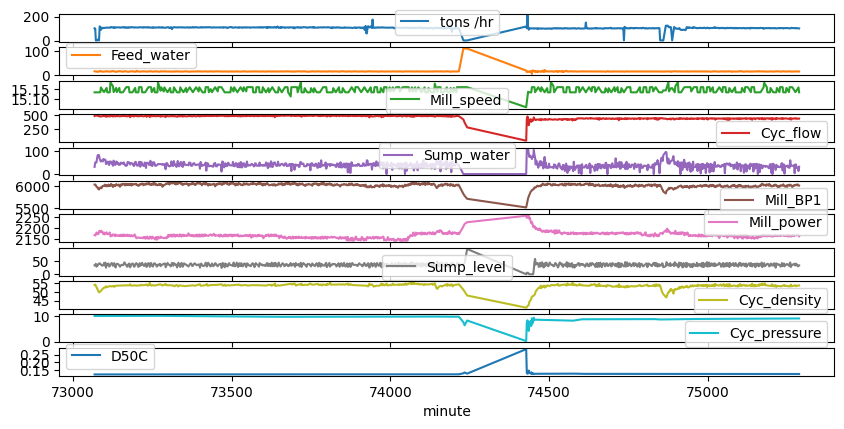

In [86]:
da.iloc[35000:36000].plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()


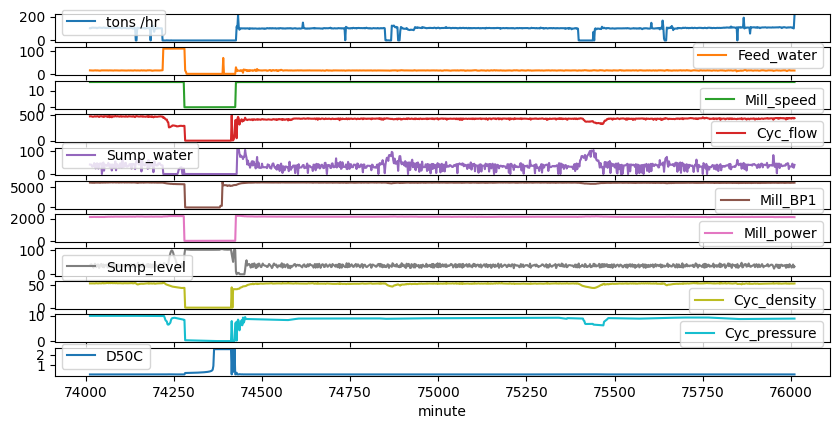

In [89]:
df.iloc[37000:38000].plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()

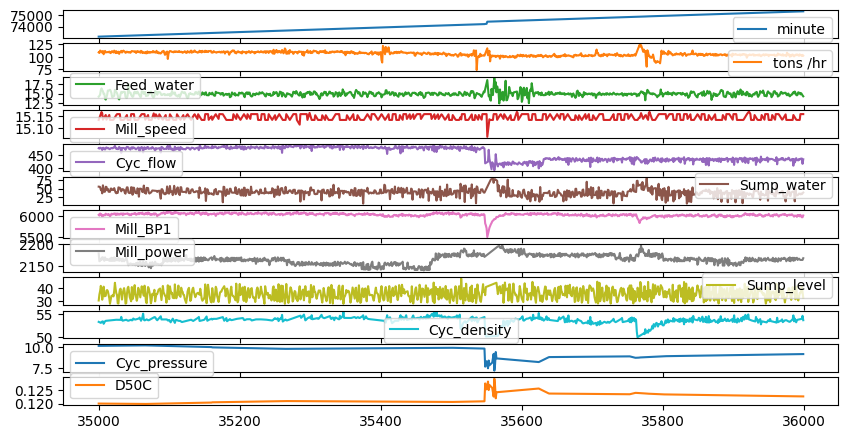

In [90]:
dfr.iloc[35000:36000].plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()

In [84]:
len(dfr)
len(df)

87085

In [72]:
dfr=dfm.reset_index()


In [91]:
len(dfm)
dfr.head()
dfr.to_excel('cube_interp.xlsx',header=True,index=True)

In [56]:
df1=pd.read_excel('smooth_interp.xlsx',header=0,index_col=0)
df1.head()

,minute,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_power,Sump_level,Cyc_density,Cyc_pressure,D50C
0,12.0,102.462509,15.509874,15.160000,525.208252,50.587109,6104.048340,2151.0,40.304512,54.255432,11.241975,0.117296
1,14.0,103.333893,16.375196,15.160000,529.151917,54.062538,6108.159180,2155.0,43.349667,54.202900,11.241036,0.117299
2,16.0,103.808968,16.706270,15.160000,527.527954,43.480278,6085.975586,2160.0,46.226486,54.150364,11.240097,0.117301
3,18.0,102.219231,17.050024,15.156041,520.946472,37.862888,6116.854980,2153.0,38.813515,54.099995,11.239159,0.117303
4,20.0,102.523087,16.613831,15.150989,520.562073,38.544147,6100.854492,2162.0,34.497410,54.051334,11.238220,0.117305


In [92]:
df1=pd.read_excel('cube_interp.xlsx',header=0,index_col=0)
df1.head()

,minute,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_power,Sump_level,Cyc_density,Cyc_pressure,D50C
0,12.0,102.462509,15.509874,15.160000,525.208252,50.587109,6104.048340,2151.0,40.304512,54.255432,11.241975,0.117296
1,14.0,103.333893,16.375196,15.160000,529.151917,54.062538,6108.159180,2155.0,43.349667,54.202900,11.241036,0.117299
2,16.0,103.808968,16.706270,15.160000,527.527954,43.480278,6085.975586,2160.0,46.226486,54.150364,11.240097,0.117301
3,18.0,102.219231,17.050024,15.156041,520.946472,37.862888,6116.854980,2153.0,38.813515,54.099995,11.239159,0.117303
4,20.0,102.523087,16.613831,15.150989,520.562073,38.544147,6100.854492,2162.0,34.497410,54.051334,11.238220,0.117305


In [4]:
def p(df):
    df.plot(kind='line',subplots=True,layout=(16,1),figsize=(10,6))
    plt.show()
    return

In [56]:


#df.head()

# clean the data by removing any null values and outliers

#df = df[df['column_name'].between(lower_bound, upper_bound)]

# calculate the rate of change for the desired columns

dfp=df.clip(0.5)

dfp = dfp.pct_change()
dfp2=dfp.copy()
dfp2=dfp2.dropna()

dfp2.head()

dfp2.loc[12.0]=dfp2.iloc[0]
dfp2=dfp2.sort_index()
dfp2.head()

dfsub=dfp.diff()

#dfp.describe()


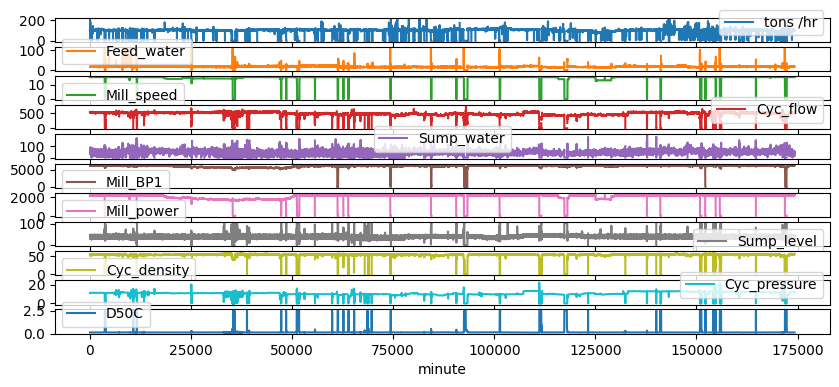

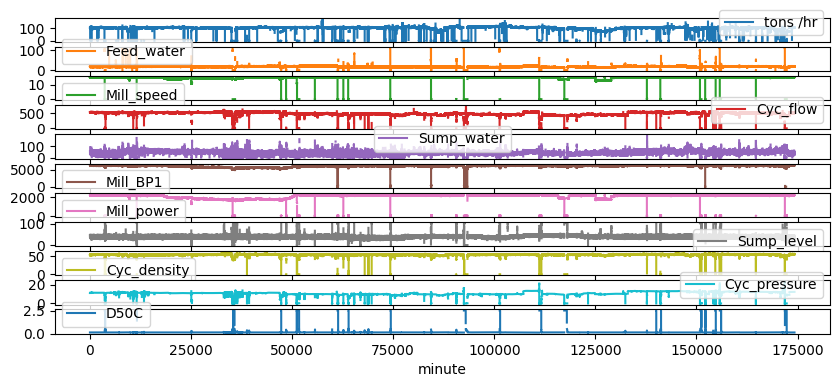

In [59]:
dfi= df[dfsub < 100] #change to 200% 
dfi2= df[dfsub < 0.0001] #change to 200% 
# # apply a filter to remove any extreme values

# #df = df[df['rate_of_change'].between(lower_bound, upper_bound)]

# #dfp=dfp.fillna()

# dfi.describe()

p(dfi)
p(dfi2)

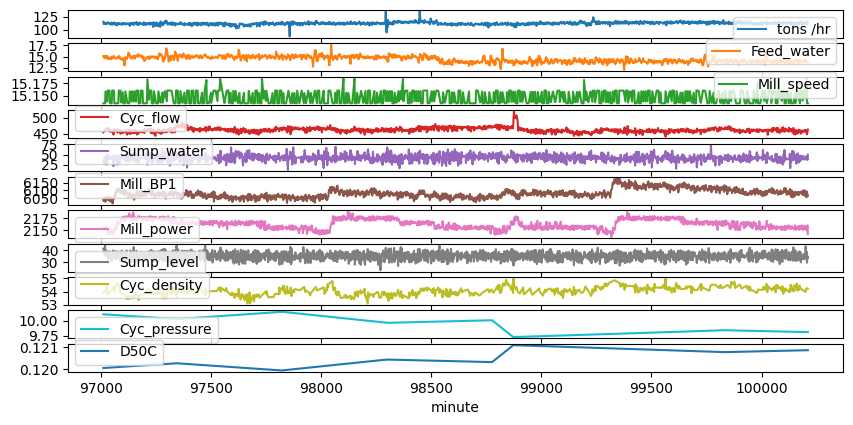

In [110]:
#df__=df['tons /hr','Cyc_flow']
dfm=df.iloc[48500:50100]
#dfm['tons /hr'].plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
#plt.show()
dfm.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()

In [111]:
dfm.to_excel('short_run.xlsx',header=True)

In [ ]:
#
# Could instead filter out spike down, fill in, then filter again to smooth out the data set.
# Could also just filter the mill BP spikes out.
# and also filter each variable like that.
# esp tph. Cut out spikes where it drops but nothing else does
# # could do this ^ for each variable. use a percent change then hey, did everything else do this? 
# # may not work with time delay
# move on to arx for after try for 30 min.




In [61]:
print(len(dfi2))
print(len(dfi2.dropna()))
#p(dfi2)
dfi2.describe()

87085
1822


,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_power,Sump_level,Cyc_density,Cyc_pressure,D50C
count,45966.000000,52254.000000,72835.000000,46306.000000,47498.000000,44587.000000,46250.000000,47750.000000,64907.000000,85205.000000,86880.000000
mean,91.520961,16.084011,14.328221,460.917634,41.756042,5903.637923,1950.816627,41.465208,51.769170,10.492187,0.173749
std,31.618146,7.785537,3.045052,117.548834,17.924635,603.267205,516.417272,14.312916,10.304781,2.404167,0.352397
min,0.000010,0.011161,0.000010,0.000010,0.363652,0.000010,0.000010,0.000010,0.000010,0.000010,0.099463
25%,97.737595,14.801639,15.134733,451.980072,34.558352,5939.371094,1925.000000,35.473558,53.398777,9.854651,0.116798
50%,102.660351,16.042566,15.139458,488.444061,43.574305,6032.459473,2152.000000,39.861727,53.993481,10.918205,0.118058
75%,105.770603,17.925564,15.155233,520.198181,52.483349,6088.851807,2165.000000,43.589619,54.558985,11.461528,0.120749
max,174.667130,110.265762,15.185266,725.713135,190.012161,6418.649902,2327.000000,103.256409,60.934116,23.575115,2.514608


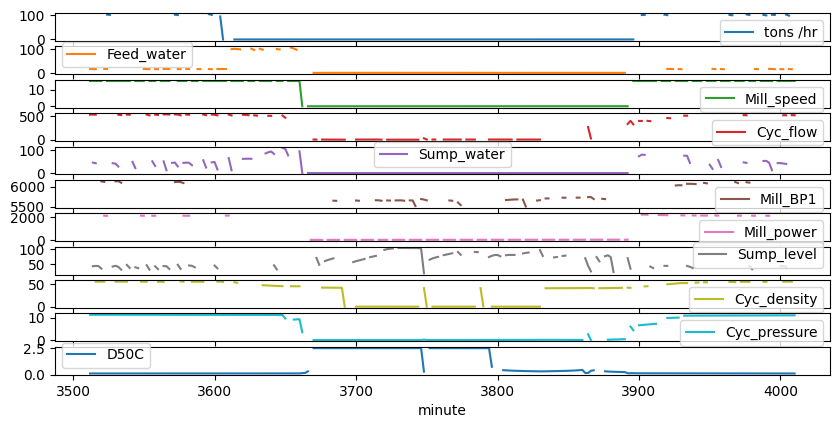

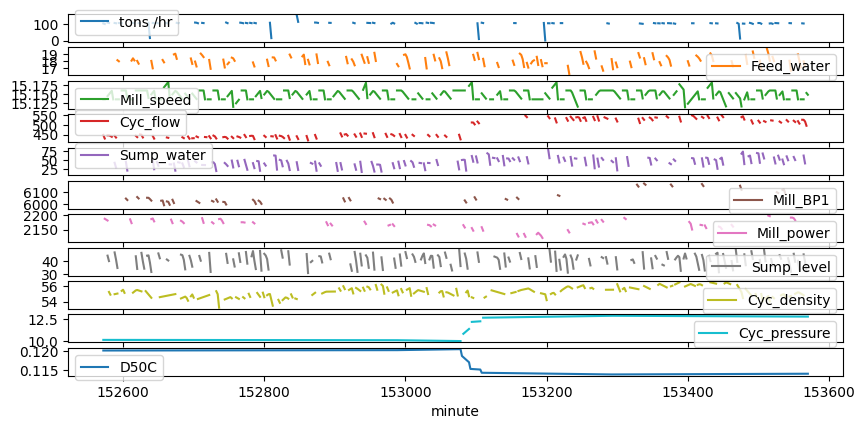

In [62]:
data0=dfi2.copy()

data=data0.iloc[1750:2000, :]
data1=data0.iloc[5750:6000, :]
#data1=data0.iloc[39900:40100, :]   #tph spike
data1=data0.iloc[76250:76750, :]   #tph spike
data.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()
data1.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()

In [ ]:
# Create a boolean mask to filter the data
mask = df['my_column'] > 5

# Use the boolean mask to filter the data and drop any rows with missing values
filtered_df = df[mask].dropna()

# Use the `interpolate()` method to fill in any missing values in the filtered data
interpolated_df = filtered_df.interpolate()

# Replace the filtered and interpolated data back into the original dataframe using boolean indexing
df.loc[mask] = interpolated_df

In [ ]:
#with 6th percentile of feed tph and 1st percentile of everything:
da=df.copy()
da = df[(df['tons /hr'] > df['tons /hr'].quantile(0.06)) & (df < upper_bound) ] #& (df < upper_bound)]

# da=df.copy()
# # find 5th percentile value for column B
# threshold = da['tons /hr'].quantile(0.05)

# # replace values below threshold with NaN
# da.loc[df['tons /hr'] < threshold, 'tons /hr'] = np.nan
# print(len(da))

#da = da.interpolate(method='slinear', limit_direction='both', axis=0)

avoid_off = da[(da > da.quantile(0.01)) & (da < da.quantile(0.99)) ]
avoid_off.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()